## Importação de Bibliotecas e Dados



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.datasets import make_regression, make_classification
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('data/Base_casas_regressao.csv')
display(df)

,Unnamed: 0,Area (m²),Quartos,Idade (anos),Distância Centro (km),Garagens,Banheiros,Andar,Vista_Mar,Mobilidade,Segurança,Area_Construida (m²),Total_Comodos,Zona,Preço (R$ mil),Area_Total (m²)
0,0,265.3,3.0,8,21.3,1,3,3.0,1,5.0,6,221.4,6,Afastada,700.4,486.7
1,1,115.9,4.0,0,5.9,2,4,6.0,0,10.0,10,106.0,8,Intermediária,858.6,221.9
2,2,62.5,2.0,28,8.6,1,2,18.0,0,4.0,8,53.8,4,Intermediária,628.4,116.3
3,3,60.7,4.0,14,0.7,1,4,1.0,0,4.0,10,55.1,8,Centro,934.1,115.8
4,4,102.4,2.0,13,3.4,1,2,NaN,0,5.0,8,83.0,4,Centro,904.5,185.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,400.0,6.0,2,2.2,1,4,22.0,0,5.0,10,338.3,10,Centro,1500.0,738.3
19996,19996,46.0,5.0,3,6.5,1,4,2.0,1,10.0,8,35.3,9,Intermediária,940.2,81.3
19997,19997,133.3,3.0,19,3.4,1,3,4.0,0,9.0,9,118.3,6,Centro,934.2,251.6
19998,19998,100.0,3.0,15,3.1,1,3,7.0,0,2.0,9,86.6,6,Centro,896.2,186.6


## Visualização dos Dados


=== DADOS AUSENTES POR COLUNA ===


,0
Unnamed: 0,0
Area (m²),8
Quartos,5
Idade (anos),0
Distância Centro (km),0
Garagens,0
Banheiros,0
Andar,8000
Vista_Mar,0
Mobilidade,10



=== Correlação Andar x Preço =================================


,Andar,Preço (R$ mil)
Andar,1.000000,0.138747
Preço (R$ mil),0.138747,1.000000



=== Possíveis Valores Mobilidade =============================


array([ 5., 10.,  4.,  9.,  1.,  8.,  3.,  7.,  2.,  6., nan])


=== Outliers =======================================================================================================================================================================


,Unnamed: 0,Area (m²),Quartos,Idade (anos),Distância Centro (km),Garagens,Banheiros,Andar,Vista_Mar,Mobilidade,Segurança,Area_Construida (m²),Total_Comodos,Zona,Preço (R$ mil),Area_Total (m²)
245,245,165.3,1.0,6,19.9,1,1,NaN,0,4.0,5,145.8,2,Afastada,199.1,311.1
370,370,42.4,1.0,26,7.5,1,1,NaN,0,2.0,7,36.8,2,Intermediária,234.4,79.2
443,443,67.2,2.0,8,20.6,1,2,NaN,0,1.0,3,56.8,4,Afastada,162.9,124.0
1551,1551,61.4,2.0,2,17.3,0,1,NaN,0,3.0,5,51.2,3,Afastada,173.8,112.7
1649,1649,129.8,1.0,27,25.5,1,1,15.0,0,6.0,4,115.6,2,Afastada,137.5,245.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19012,19012,73.9,1.0,38,7.1,1,1,22.0,0,3.0,8,62.5,2,Intermediária,201.1,136.4
19067,19067,128.3,1.0,44,9.9,0,1,NaN,0,5.0,8,108.5,2,Intermediária,176.6,236.8
19318,19318,178.2,1.0,44,9.7,1,1,NaN,0,7.0,7,142.6,2,Intermediária,252.2,320.8
19434,19434,128.1,1.0,1,18.3,1,1,NaN,0,2.0,5,108.4,2,Afastada,244.4,236.5


'Limite Inferior: 253.59'


=== Matriz de Correlação ===========================================================================================================================================================


,Unnamed: 0,Area (m²),Quartos,Idade (anos),Distância Centro (km),Garagens,Banheiros,Andar,Vista_Mar,Mobilidade,Segurança,Area_Construida (m²),Total_Comodos,Preço (R$ mil),Area_Total (m²)
Unnamed: 0,1.000000,0.003266,-0.003952,0.009816,0.004820,-0.003933,-0.003798,0.007716,0.008570,-0.009430,0.001730,0.003863,-0.004204,-0.004341,0.003578
Area (m²),0.003266,1.000000,-0.001850,0.002776,-0.003687,0.011348,0.002004,0.009003,0.016788,0.000706,0.004656,0.996342,-0.000068,0.321022,0.999224
Quartos,-0.003952,-0.001850,1.000000,-0.001589,0.003979,0.378934,0.866974,0.001997,-0.000100,0.004711,-0.006350,-0.002261,0.972413,0.586265,-0.002026
Idade (anos),0.009816,0.002776,-0.001589,1.000000,0.001199,0.002318,0.001859,0.002504,-0.014523,-0.008767,-0.009573,0.003567,-0.000066,-0.272897,0.003133
Distância Centro (km),0.004820,-0.003687,0.003979,0.001199,1.000000,0.002554,0.006667,0.004983,-0.005570,0.002524,-0.722376,-0.003510,0.005614,-0.442733,-0.003616
Garagens,-0.003933,0.011348,0.378934,0.002318,0.002554,1.000000,0.392214,-0.001136,0.007538,0.007474,-0.005793,0.010945,0.398648,0.311889,0.011207
Banheiros,-0.003798,0.002004,0.866974,0.001859,0.006667,0.392214,1.000000,0.004733,-0.003760,0.003868,-0.011064,0.001712,0.958825,0.555950,0.001885
Andar,0.007716,0.009003,0.001997,0.002504,0.004983,-0.001136,0.004733,1.000000,-0.002453,0.001590,-0.004277,0.008514,0.003329,0.138747,0.008775
Vista_Mar,0.008570,0.016788,-0.000100,-0.014523,-0.005570,0.007538,-0.003760,-0.002453,1.000000,0.000401,0.000776,0.016212,-0.001652,0.193854,0.016570
Mobilidade,-0.009430,0.000706,0.004711,-0.008767,0.002524,0.007474,0.003868,0.001590,0.000401,1.000000,-0.005841,0.001115,0.004672,0.139657,0.000832



=== Correlação de cada feature com o Preço: =======================================================================================================================================


,Preço (R$ mil)
Preço (R$ mil),1.000000
Total_Comodos,0.592400
Quartos,0.586265
Banheiros,0.555950
Segurança,0.368180
Area (m²),0.321022
Area_Total (m²),0.320470
Area_Construida (m²),0.319150
Garagens,0.311889
Vista_Mar,0.193854


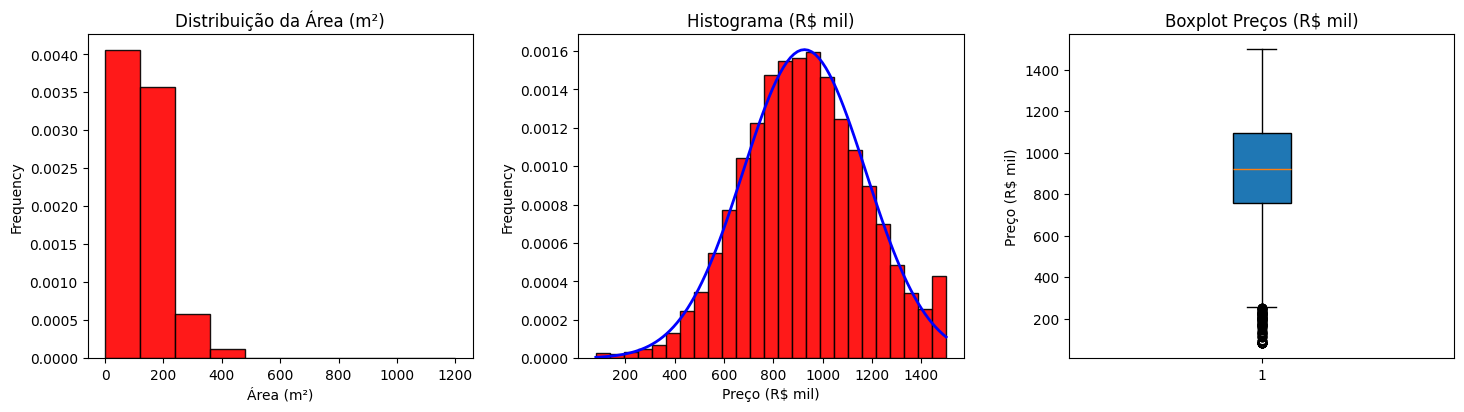

In [ ]:
# Identificando Dados Ausentes
print('\n=== DADOS AUSENTES POR COLUNA ===')
display(df.isnull().sum())

# Correlação Andar X Preço
print('\n=== Correlação Andar x Preço =================================')
corr_and_prec = df[['Andar', 'Preço (R$ mil)']].corr()
display(corr_and_prec)

# Valores Mobilidade
print('\n=== Possíveis Valores Mobilidade =============================')
mob_un = df['Mobilidade'].unique()
display(mob_un)
print

# Distribuição Dados Área
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
df['Area (m²)'].plot(kind='hist', bins=10, color='red', edgecolor='black', alpha=0.9, density=True)
plt.title('Distribuição da Área (m²)')
plt.xlabel('Área (m²)')

# Distribuição Preços (Histograma)
plt.subplot(2, 3, 2)
dados_preco = df['Preço (R$ mil)']
media = dados_preco.mean()
desvio = dados_preco.std()
x = np.linspace(min(dados_preco), max(dados_preco), 100)
y = norm.pdf(x, media, desvio)

plt.plot(x, y, color='blue', linewidth=2)
plt.tight_layout()

df['Preço (R$ mil)'].plot(kind='hist', bins=25, color='red', edgecolor='black', alpha=0.9, density=True)
plt.title('Histograma (R$ mil)')
plt.xlabel('Preço (R$ mil)')

#Distribuição dos Preços (Boxplot)
print('\n=== Outliers =======================================================================================================================================================================')
plt.subplot(2, 3, 3)
plt.boxplot(df['Preço (R$ mil)'], patch_artist=True)
plt.title('Boxplot Preços (R$ mil)')
plt.ylabel('Preço (R$ mil)')
plt.tight_layout(pad=2)

q1 = df['Preço (R$ mil)'].quantile(0.25)
q2 = df['Preço (R$ mil)'].quantile(0.50)
q3 = df['Preço (R$ mil)'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
outliers = df[df['Preço (R$ mil)'] < limite_inferior]
display(outliers)
display(f'Limite Inferior: {limite_inferior:.2f}')

print('\n=== Matriz de Correlação ===========================================================================================================================================================')
corr_num = df.corr(numeric_only=True)
display(corr_num)
print(f"\n=== Correlação de cada feature com o Preço: =======================================================================================================================================")
display(corr_num['Preço (R$ mil)'].sort_values(ascending=False))

## Tratamento

In [ ]:
df = pd.read_csv('Base_casas_regressao.csv')
# Tratamento Andar
# Remoçao da feature 'Andar, pois tem quase metade dos dados e faltante e apresenta correlação baixa com o preço, gerando pouquíssimo impacto na acurácia do modelo
df.drop(columns=['Andar'], inplace=True)

# Tratamento Área (m2)
# Adicionando os valores faltantes da área com a mediana, pois a distribuição não é normal
df['Area (m²)'].fillna(df['Area (m²)'].median(), inplace=True)

# Tratamento Quartos
# Adicionando os valores faltantes de Quartos com a moda, pois se trata de uma variável discreta
df['Quartos'].fillna(df['Quartos'].mode()[0], inplace=True)

# Tratamento Mobilidade
# Adicionando os valores faltantes de Mobilidade com a média, pois se trata de uma nota atribuída ao apartamento
df['Mobilidade'].fillna(df['Mobilidade'].mean(), inplace=True)

# Tratamento Zona
# Normalização - converter texto para valores numéricos
zona_num = {'Afastada': 0, 'Intermediária': 1, 'Centro': 2}
df['Zona'] = df['Zona'].map(zona_num)

# Remoção de features
df.drop(columns=['Area_Total (m²)'], inplace=True) # Redundante com área
df.drop(columns=['Area_Construida (m²)'], inplace=True) # Redundante com área
df.drop(columns=['Quartos'], inplace=True) # VIF alto indicando multicolinearidade com total de cômodos
df.drop(columns=['Banheiros'], inplace=True) # Redundante com total de cômodos
df.drop(columns=['Unnamed: 0'], inplace=True) # Coluna só para identificar posição da linha
df.drop(columns=['Mobilidade'], inplace=True) # Simplificar modelo - correlação com o preço fraca e praticamente inexistente com outras features
df.drop(columns=['Segurança'], inplace=True) # VIF alto indicando multicolinearidade
df.drop(columns=['Zona'], inplace=True) # VIF alto indicando multicolinearidade com a distância do centro

print('=== Matriz de Correlação ===\n')
corr_num = df.corr(numeric_only=True)
display(corr_num)
print(f"\n=== Correlação de cada feature com o Preço: ===========================================================================")
display(corr_num['Preço (R$ mil)'].sort_values(ascending=False))

# Não há necissidade de tratar outliers pois se tratam de uma parcela muito pequena da amostra e parecem ser dados reais, onde não houve erro de input

=== Matriz de Correlação ===



/tmp/ipython-input-696239032.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area (m²)'].fillna(df['Area (m²)'].median(), inplace=True)
/tmp/ipython-input-696239032.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,Area (m²),Idade (anos),Distância Centro (km),Garagens,Vista_Mar,Total_Comodos,Preço (R$ mil)
Area (m²),1.000000,0.002800,-0.003683,0.011315,0.016801,-0.000091,0.321002
Idade (anos),0.002800,1.000000,0.001199,0.002318,-0.014523,-0.000066,-0.272897
Distância Centro (km),-0.003683,0.001199,1.000000,0.002554,-0.005570,0.005614,-0.442733
Garagens,0.011315,0.002318,0.002554,1.000000,0.007538,0.398648,0.311889
Vista_Mar,0.016801,-0.014523,-0.005570,0.007538,1.000000,-0.001652,0.193854
Total_Comodos,-0.000091,-0.000066,0.005614,0.398648,-0.001652,1.000000,0.592400
Preço (R$ mil),0.321002,-0.272897,-0.442733,0.311889,0.193854,0.592400,1.000000



=== Correlação de cada feature com o Preço: ===========================================================================


,Preço (R$ mil)
Preço (R$ mil),1.000000
Total_Comodos,0.592400
Area (m²),0.321002
Garagens,0.311889
Vista_Mar,0.193854
Idade (anos),-0.272897
Distância Centro (km),-0.442733


## Análise Exploratória

Variance Inflation Factor (VIF) para cada feature:


,Feature,VIF
0,Area (m²),3.731876
1,Idade (anos),1.794723
2,Distância Centro (km),2.660688
3,Garagens,5.217128
4,Vista_Mar,1.233713
5,Total_Comodos,7.539328



=== Matriz de Correlação de Pearson =====================================================================================


<Axes: >

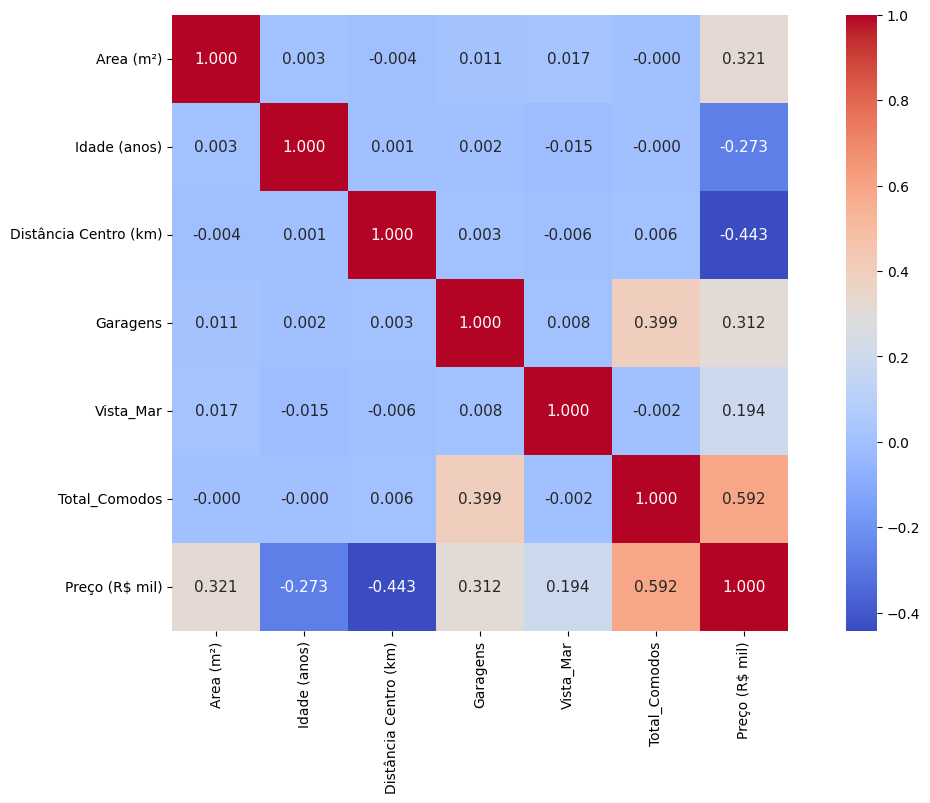

In [ ]:
# Multicolinearidade - VIF para cada feature
X_reg = df.drop(columns=['Preço (R$ mil)'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X_reg.columns
vif_data["VIF"] = [variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])]

print("Variance Inflation Factor (VIF) para cada feature:")
display(vif_data)

# Correlações
plt.figure(figsize=(15, 8))
print('\n=== Matriz de Correlação de Pearson =====================================================================================')
sns.heatmap(corr_num, annot=True, cmap='coolwarm', fmt='.3f', square=True, annot_kws={"size": 11})


## Treinamento do Modelo (Regressão Linear Múltipla)

=== Regressão Linear Múltipla: Preço vs Todas as Features ===========================================================================================================

Equação do Modelo:
Preço = 528.00 + 1.1187 × Area (m²) + -6.6305 × Idade (anos) + -26.1099 × Distância Centro (km) + 29.5611 × Garagens + 112.0548 × Vista_Mar + 66.5843 × Total_Comodos

Coeficientes do Modelo:
              Feature  Coeficiente  Valor Absoluto
            Vista_Mar   112.054773      112.054773
        Total_Comodos    66.584283       66.584283
             Garagens    29.561134       29.561134
Distância Centro (km)   -26.109914       26.109914
         Idade (anos)    -6.630490        6.630490
            Area (m²)     1.118664        1.118664

Intercepto (β₀): 528.00

=== Normalidade e Simetria dos Dados ================================================================================================================================

Teste de Shapiro-Wilk para Normalidade:
Estatística: 0.9967
P-value: 0.00

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


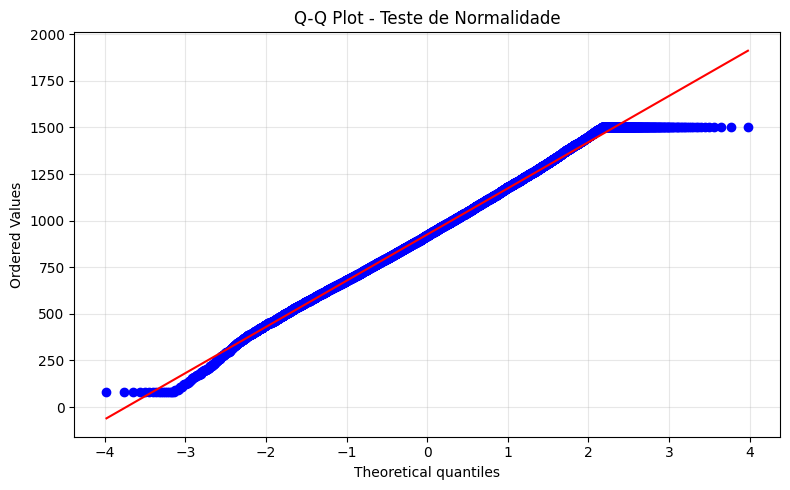

In [ ]:
# Regressão Linear Múltipla
X = df.drop(columns=['Preço (R$ mil)'])
y = df['Preço (R$ mil)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

beta_0 = model.intercept_
betas = model.coef_

print("=== Regressão Linear Múltipla: Preço vs Todas as Features ===========================================================================================================")
print(f"\nEquação do Modelo:")
print(f"Preço = {beta_0:.2f}", end="")
for i, feature in enumerate(X.columns):
    print(f" + {betas[i]:.4f} × {feature}", end="")
print()

print(f"\nCoeficientes do Modelo:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': betas,
    'Valor Absoluto': np.abs(betas)
}).sort_values('Valor Absoluto', ascending=False)

print(coef_df.to_string(index=False))
print(f"\nIntercepto (β₀): {beta_0:.2f}")

# Teste de Shapiro-Wilk (Normalidade dos Dados)
print("\n=== Normalidade e Simetria dos Dados ================================================================================================================================")
statistic, p_value = stats.shapiro(df['Preço (R$ mil)'])

print("\nTeste de Shapiro-Wilk para Normalidade:")
print(f"Estatística: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Interpretação:")
if p_value > 0.05:
    print(f"✓ P-value ({p_value:.4f}) > 0.05: Dados são normalmente distribuídos")
else:
    print(f"✗ P-value ({p_value:.4f}) < 0.05: Dados NÃO são normalmente distribuídos\n")

# Q-Q Plot (Quantile-Quantile Plot) (Simetria dos Dados)
plt.figure(figsize=(8,5))
stats.probplot(df['Preço (R$ mil)'], dist="norm", plot=plt)
plt.title("Q-Q Plot - Teste de Normalidade")
plt.grid(True, alpha=0.3)
print(f"Assimetria (Skewness): {df['Preço (R$ mil)'].skew():.2f}")
print('Dados são simétricos\n')
plt.tight_layout()

## Avaliação do Modelo (Regressão Linear Múltipla)

In [ ]:
# Calcular métricas
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Métricas de Avaliação - Regressão Linear Múltipla")
print("\n" + "="*50)
print(f"{'Métrica':<20} {'Treino':<15} {'Teste':<15}")
print("="*50)
print(f"{'R² Score':<20} {r2_train:<15.4f} {r2_test:<15.4f}")
print(f"{'MSE':<20} {mse_train:<15.2f} {mse_test:<15.2f}")
print(f"{'RMSE':<20} {rmse_train:<15.2f} {rmse_test:<15.2f}")
print(f"{'MAE':<20} {mae_train:<15.2f} {mae_test:<15.2f}")
print("="*50)
print('\nO modelo explica 77% da variação dos preços dos imóveis, e erra mais ou menos R$ 94 mil o valor de um imóvel')

#O modelo de regressão linear múltipla está explicando cerca de 77% da variação dos preços dos imóveis, com erro médio de cerca de R$ 94 mil a R$ 117 mil, e sem sinais de overfitting.

Métricas de Avaliação - Regressão Linear Múltipla

Métrica              Treino          Teste          
R² Score             0.7644          0.7733         
MSE                  14551.25        13819.85       
RMSE                 120.63          117.56         
MAE                  95.67           93.81          

O modelo explica 77% da variação dos preços dos imóveis, e erra mais ou menos R$ 94 mil o valor de um imóvel


## Ajuste do Modelo (Regressão Linear Múltipla)

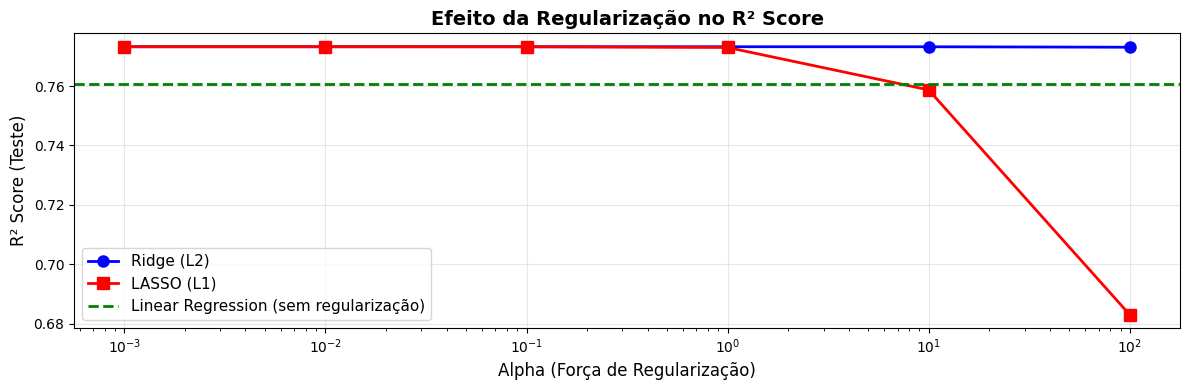

Efeito da Regularização:

Alpha      Ridge R²        LASSO R²       
0.001      0.7733          0.7733         
0.01       0.7733          0.7733         
0.1        0.7733          0.7733         
1          0.7733          0.7730         
10         0.7733          0.7587         
100        0.7731          0.6830         

O modelo já está bem ajustado e não precisa de muita regularização, indicando que não há overfitting significativo, nem multicolinearidade relevante.


In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Ridge
ridge_scores = []
ridge_models = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    ridge_scores.append(score)
    ridge_models.append(model)

# LASSO
lasso_scores = []
lasso_models = []
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    lasso_scores.append(score)
    lasso_models.append(model)

# Visualizar efeito da regularização
plt.figure(figsize=(12, 4))
plt.plot(alphas, ridge_scores, 'o-', linewidth=2, markersize=8, label='Ridge (L2)', color='blue')
plt.plot(alphas, lasso_scores, 's-', linewidth=2, markersize=8, label='LASSO (L1)', color='red')
plt.axhline(y=r2_test, color='green', linestyle='--', linewidth=2, label='Linear Regression (sem regularização)')
plt.xscale('log')
plt.xlabel('Alpha (Força de Regularização)', fontsize=12)
plt.ylabel('R² Score (Teste)', fontsize=12)
plt.title('Efeito da Regularização no R² Score', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Efeito da Regularização:")
print(f"\n{'Alpha':<10} {'Ridge R²':<15} {'LASSO R²':<15}")
print("="*40)
for alpha, ridge_score, lasso_score in zip(alphas, ridge_scores, lasso_scores):
    print(f"{alpha:<10} {ridge_score:<15.4f} {lasso_score:<15.4f}")
print('\nO modelo já está bem ajustado e não precisa de muita regularização, indicando que não há overfitting significativo, nem multicolinearidade relevante.')


## Visualização do Modelo (Predito x Real)

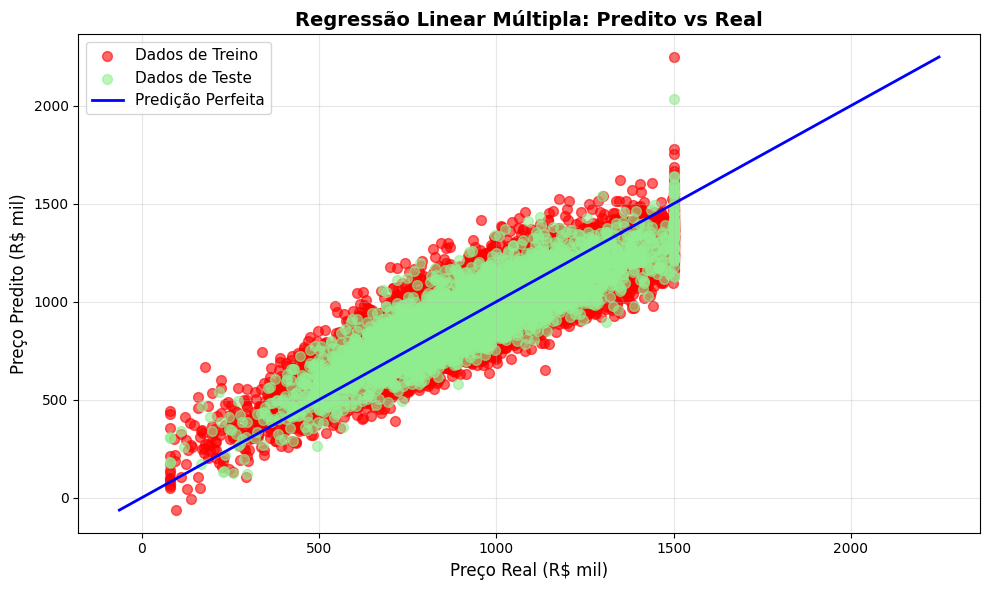


O modelo demonstra bem a relação entre as variáveis e o preço dos imóveis, representado pela proximidade dosp ontos verdes com a linha azul


In [ ]:
# Visualizar predições vs valores reais
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train, alpha=0.6, s=50, label='Dados de Treino', color='red')
plt.scatter(y_test, y_pred_test, alpha=0.6, s=50, label='Dados de Teste', color='lightgreen')

min_val = min(y.min(), y_pred_train.min(), y_pred_test.min())
max_val = max(y.max(), y_pred_train.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'b-', linewidth=2, label='Predição Perfeita')

plt.xlabel('Preço Real (R$ mil)', fontsize=12)
plt.ylabel('Preço Predito (R$ mil)', fontsize=12)
plt.title('Regressão Linear Múltipla: Predito vs Real', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('\nO modelo demonstra bem a relação entre as variáveis e o preço dos imóveis, representado pela proximidade dosp ontos verdes com a linha azul')

## Resíduos do Modelo


Os erros essão distribuídos de forma equilibrada, praticamente normal, comprovando que a regressão linear múltipla é uma escolha adequada


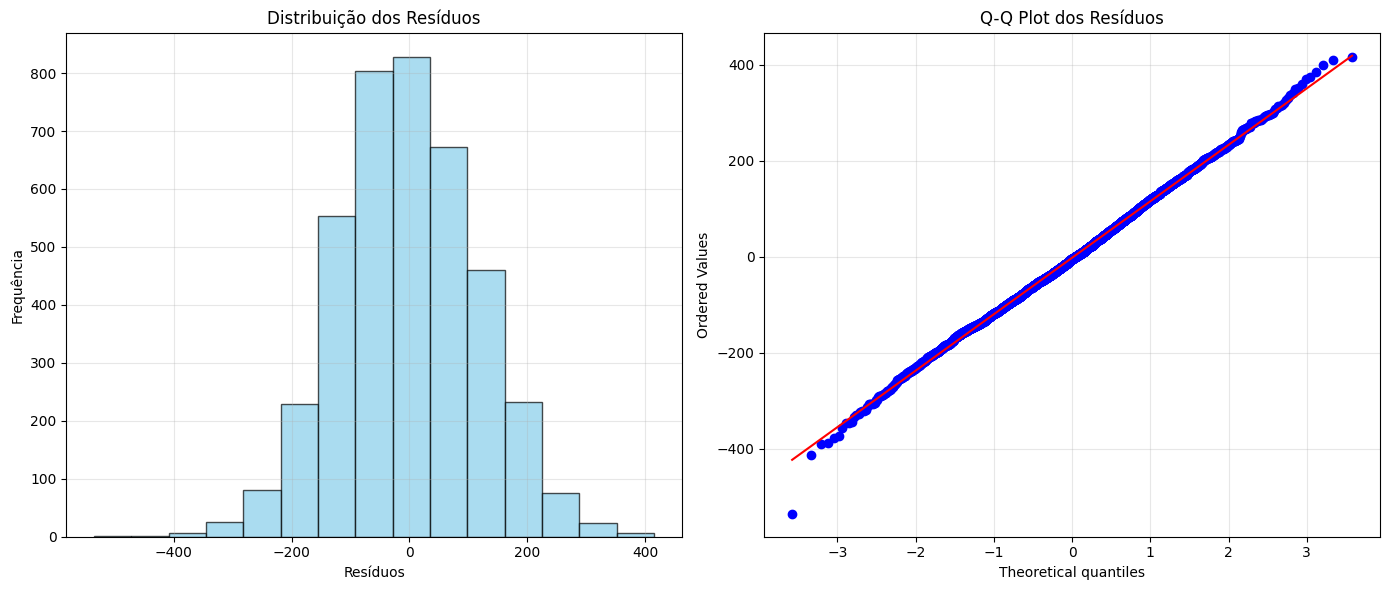

In [ ]:
# Calcular resíduos
residuals = y_test - y_pred_test

# Histograma dos resíduos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].hist(residuals, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Resíduos')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição dos Resíduos')
axes[0].grid(True, alpha=0.3)

# Q-Q Plot dos resíduos
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot dos Resíduos')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()

print('\nOs erros essão distribuídos de forma equilibrada, praticamente normal, comprovando que a regressão linear múltipla é uma escolha adequada')

## Treinamento do Modelo (Random Forest)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train_rf)
r2_test = r2_score(y_test, y_pred_test_rf)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print("=== Métricas de Avaliação - Random Forest Regressor ===")
print(f"R² Treino: {r2_train:.4f}")
print(f"R² Teste:  {r2_test:.4f}")
print(f"RMSE Treino: {rmse_train:.2f}")
print(f"RMSE Teste:  {rmse_test:.2f}")

print('\nModelo já esta bem ajustado e os dados estão dispersos de forma linear, assim o random forest acaba sendo menos preciso do que a regressão linear neste caso')

=== Métricas de Avaliação - Random Forest Regressor ===
R² Treino: 0.8084
R² Teste:  0.7608
RMSE Treino: 108.78
RMSE Teste:  120.76

Modelo já esta bem ajustado e os dados estão dispersos de forma linear, assim o random forest acaba sendo menos preciso do que a regressão linear neste caso
